In [1]:
import pandas as pd, numpy as np, seaborn as sns
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [15]:
data = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')

print(data.columns)
data.head(3)

Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...


In [16]:
may_data=pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')
may_data.head(3)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."


In [17]:
print(data['reviews.rating'].value_counts())             #/len(data['reviews.rating'])
print(may_data['reviews.rating'].value_counts())         #/len(may_data['reviews.rating'])

5    3478
4    1208
3     197
1      63
2      54
Name: reviews.rating, dtype: int64
5    19897
4     5648
3     1206
1      965
2      616
Name: reviews.rating, dtype: int64


#### We see from both datasets that have been provided that both of them are imbalanced datasets considering the target variable review rating.
- We can continue to use this as it is but it will affect the accuracy of the prediction- model in the later stage.

So I decided to combine both the datasets. Even after that it was still an imbalanced dataset as we can see because both are imabalanced ofcourse! Therefore I did oversampling on the combined data which gave me MemoryError (because bruh its 20+k into 5 times )
Therefore I have taken only the part of the dataset of may reviews which gave ratings less than 4 and combined with the data and performed over sampling on it. 

In [18]:
may=may_data[may_data['reviews.rating']<4]
may['reviews.rating'].value_counts()

3    1206
1     965
2     616
Name: reviews.rating, dtype: int64

In [69]:
#Extracting only the columns that are required for this analysis 

print(data.shape)
print(may.shape)

d=pd.concat([data,may])
df=d.copy()
df=df[['reviews.text','reviews.rating']]
type(df['reviews.text'])

(5000, 24)
(2787, 24)


pandas.core.series.Series

In [13]:
def text_clean(review):
    review=review.lower()
    review=word_tokenize(review)
    review=[item for item in review if item.isalpha()]
    review=[WordNetLemmatizer().lemmatize(y) for y in review]
    review=[item for item in review if item not in stopwords.words('english')]
    review=str(' '.join(review))
    print(review)

#### Converted the reviews to lower case and and lemmatized using WordNetLemmatizer and vectorized using TfidfVectorizer

In [70]:
df["reviews.text"]=df["reviews.text"].str.lower() 
df['reviews.text'] = df.apply(lambda row: word_tokenize(row['reviews.text']), axis=1)
df["reviews.text"] = df['reviews.text'].apply(lambda x: [item for item in x if item.isalpha()])
df['reviews.text'] = df['reviews.text'].apply(lambda x : [WordNetLemmatizer().lemmatize(y) for y in x])
df['reviews.text'] = df['reviews.text'].apply(lambda x: [item for item in x if item not in stopwords.words('english')])
df["reviews.text"] = df["reviews.text"].apply(lambda x: str(' '.join(x)))
type(df["reviews.text"])

pandas.core.series.Series

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
t_vect = pd.DataFrame(TfidfVectorizer().fit_transform(df['reviews.text']).toarray())
t_vect

,0,1,2,3,4,5,6,7,8,9,...,5846,5847,5848,5849,5850,5851,5852,5853,5854,5855
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7783,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7784,0.0,0.0,0.0,0.0,0.0,0.095706,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7785,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Oversampling on the vectorized data and the dataset is balanced

In [24]:
from imblearn import over_sampling, under_sampling
os=over_sampling.SMOTE()
xos,yos=os.fit_resample(t_vect,df['reviews.rating'])

In [25]:
from collections import Counter
Counter(yos)

Counter({3: 3478, 5: 3478, 4: 3478, 1: 3478, 2: 3478})

#### Just some visualizations of previous datasets to understand how much imbalanced the datsets were

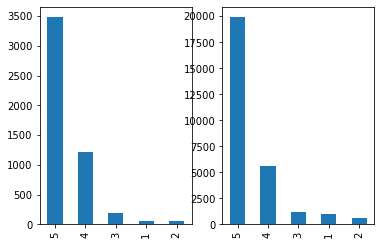

In [26]:
plt.subplot(1,2,1)
data['reviews.rating'].value_counts().plot(kind='bar')
plt.subplot(1,2,2)
may_data['reviews.rating'].value_counts().plot(kind='bar')

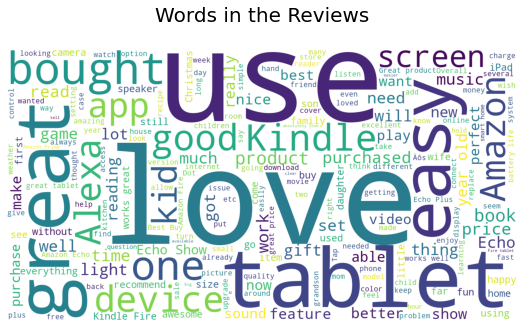

In [27]:
from wordcloud import WordCloud
rt = data['reviews.text']
wordcloud = WordCloud(background_color='white',
                      width=1500,
                      height=800
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Words in the Reviews\n',size=20)
plt.axis('off')
plt.show()

In [28]:
print(df['reviews.rating'].value_counts()/len(df['reviews.rating'])*100)


5    44.664184
3    18.017208
4    15.513035
1    13.201490
2     8.604084
Name: reviews.rating, dtype: float64


In [29]:
#Oversampled Data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(xos, yos, test_size=0.3, random_state=1)

In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1)
clf.fit(x_train, y_train)
yp = clf.predict(x_test)
yp_train = clf.predict(x_train)

In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy for train data: ',accuracy_score(yp_train,y_train))
print('Accuracy for test data: ',accuracy_score(yp,y_test))

Accuracy for train data:  0.8651934609381418
Accuracy for test data:  0.7960513705194556


In [ ]:
Here I got quite good accuracy compared to previous model I had tried where the accuracy was just 69% approximately (This was because of imbalanced data )
Oversampling the data improved the accuracy quite significantly.
Hence to increase the accuracy more we will find the best params that will increase the model's accuracy by using GridSearchCV on below params and Logistic regression

Note- I selected Logistic Regression model without any thought 

In [20]:
params={'C': [0.01, 0.1, 1, 10,],
    'penalty':['l1', 'l2'],
        'max_iter':[100,200,300],
        'multi_class':['auto', 'ovr', 'multinomial'],
       }

In [21]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(clf,param_grid=params,verbose=1)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(estimator=LogisticRegression(random_state=1),
             param_grid={'C': [0.01, 0.1, 1, 10], 'max_iter': [100, 200, 300],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [22]:
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'max_iter': 300, 'multi_class': 'auto', 'penalty': 'l2'}
accuracy : 0.8459699432576487


In [23]:

clf = LogisticRegression(C=10,max_iter=300)
clf.fit(x_train, y_train)
yp = clf.predict(x_test)
yp_train = clf.predict(x_train)

from sklearn.metrics import accuracy_score
print('Accuracy for train data: ',accuracy_score(yp_train,y_train))
print('Accuracy for test data: ',accuracy_score(yp,y_test))

Accuracy for train data:  0.9492319066787152
Accuracy for test data:  0.8608395629672225


#### After using the best parameters The accuracy has increased quite a lot en=ven though the test and train accuracy has much difference this is an improvement!

In [24]:


from sklearn.ensemble import RandomForestClassifier
df=RandomForestClassifier()
df.fit(x_train, y_train)
ypdf = df.predict(x_test)
ypdf_train = df.predict(x_train)

from sklearn.metrics import accuracy_score
print('Accuracy for train data: ',accuracy_score(ypdf_train,y_train))
print('Accuracy for test data: ',accuracy_score(ypdf,y_test))

Accuracy for train data:  0.9965497412305923
Accuracy for test data:  0.9152769791067663


#### RandomForest gave good accuracy without even looking for best parameters but we are still going to look for them because you never know!! There may be more better out there!

In [27]:
params_rf = {'n_estimators':[100,200,300],
         'criterion':['gini','entropy'],
         'max_features' : ["auto", "sqrt"]
          
         }

In [28]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(df,param_grid=params_rf,verbose=3)
grid.fit(x_train,y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.895 total time=  23.4s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.897 total time=  23.9s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.890 total time=  23.6s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.896 total time=  23.5s
[CV 5/5] END criterion=gini, max_features=auto, n_estimators=100;, score=0.882 total time=  23.7s
[CV 1/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.899 total time=  46.4s
[CV 2/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.906 total time=  46.7s
[CV 3/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.895 total time=  47.3s
[CV 4/5] END criterion=gini, max_features=auto, n_estimators=200;, score=0.901 total time=  47.1s
[CV 5/5] END criterion=gini, max_features=auto, n_estimat

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [29]:
print("tuned hpyerparameters :(best parameters) ",grid.best_params_)
print("accuracy :",grid.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 300}
accuracy : 0.9008457529286511


In [74]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion= 'entropy', max_features='sqrt', n_estimators= 300)
rf.fit(x_train, y_train)
ypdf = rf.predict(x_test)
ypdf_train = rf.predict(x_train)

from sklearn.metrics import accuracy_score
print('Accuracy for train data: ',accuracy_score(ypdf_train,y_train))
print('Accuracy for test data: ',accuracy_score(ypdf,y_test))

Accuracy for train data:  0.9970426353405076
Accuracy for test data:  0.9225608587310715


#### I chose Random Forest Classifier model since it gave the 92% prediction rate for test data

In [32]:
import joblib
model_file_name='review.pkl'
vectorizer_filename='tfidf.pkl'
joblib.dump(df,model_file_name)
joblib.dump(vect,vectorizer_filename)

['tfidf.pkl']